In [48]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
from scipy.stats import norm, skew
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import missingno as msno

In [17]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [43]:
print(df_train.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [46]:
from sklearn.preprocessing import LabelEncoder

for i in range(train.shape[1]):
    if train.iloc[:,i].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(train.iloc[:,i].values) + list(test.iloc[:,i].values))
        train.iloc[:,i] = lbl.transform(list(train.iloc[:,i].values))
        test.iloc[:,i] = lbl.transform(list(test.iloc[:,i].values))

print(train['SaleCondition'].unique())

[4 0 5 1 2 3]


In [44]:
print(df_train['SaleCondition'].unique())

['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']


In [41]:
print("Train set size:", df_train.shape)
print("Test set size:", df_test.shape)

Train set size: (1458, 81)
Test set size: (1459, 80)


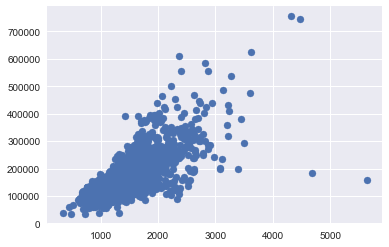

In [19]:
plt.scatter(df_train.GrLivArea, df_train.SalePrice)

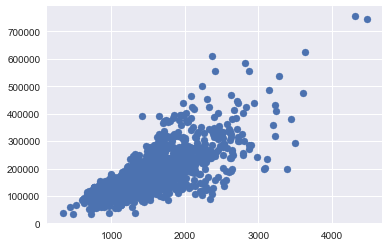

In [20]:
df_train = df_train[df_train.GrLivArea < 4500]
plt.scatter(df_train.GrLivArea, df_train.SalePrice)

In [21]:
print(len(np.unique(train['Id'])) == len(df_train))
len(np.unique(df_test['Id'])) == len(df_test)


True


True

In [22]:
len(df_train)

1458

In [23]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [24]:
df_train['SalePrice'].describe()

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

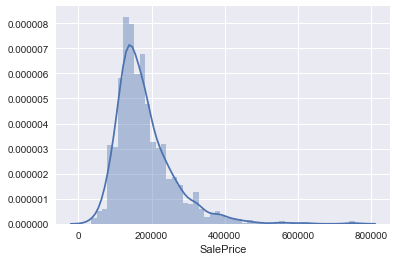

In [25]:
sns.distplot(df_train['SalePrice']);

In [26]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.881296
Kurtosis: 6.523067


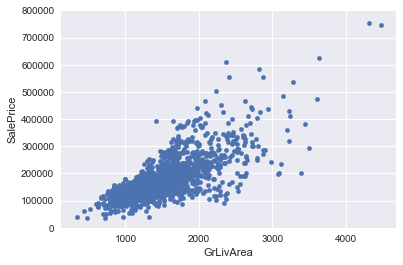

In [27]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

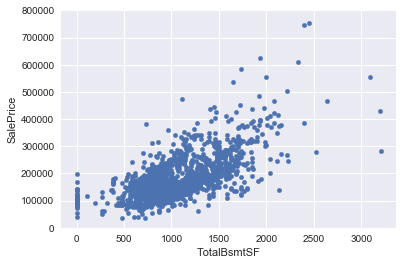

In [28]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));


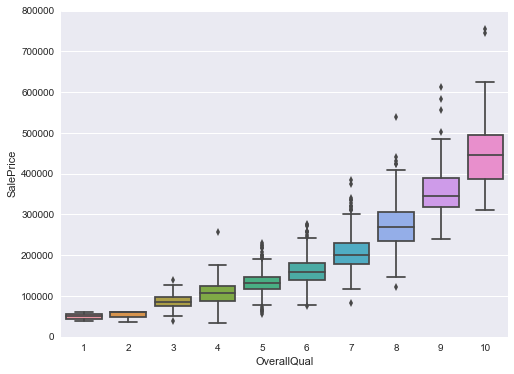

In [29]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

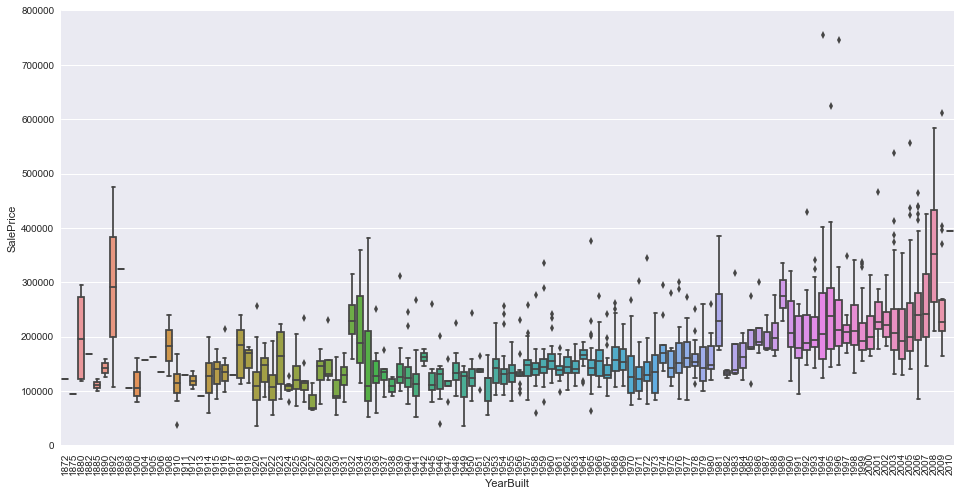

In [30]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

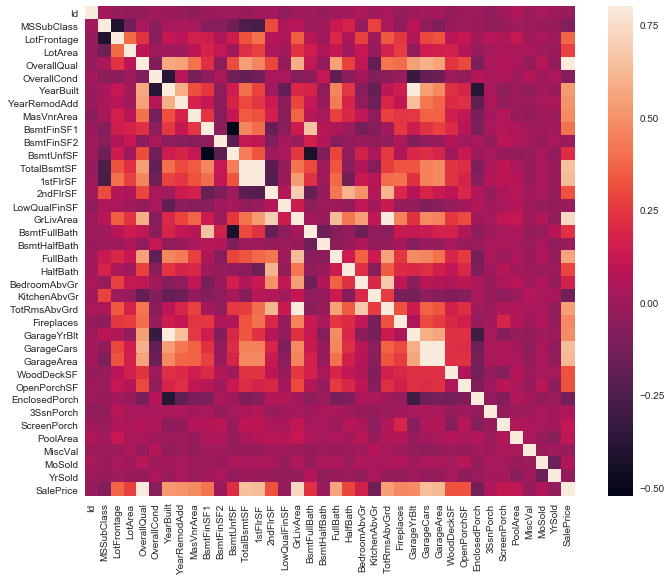

In [31]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

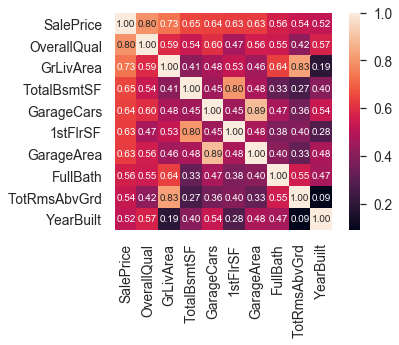

In [32]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


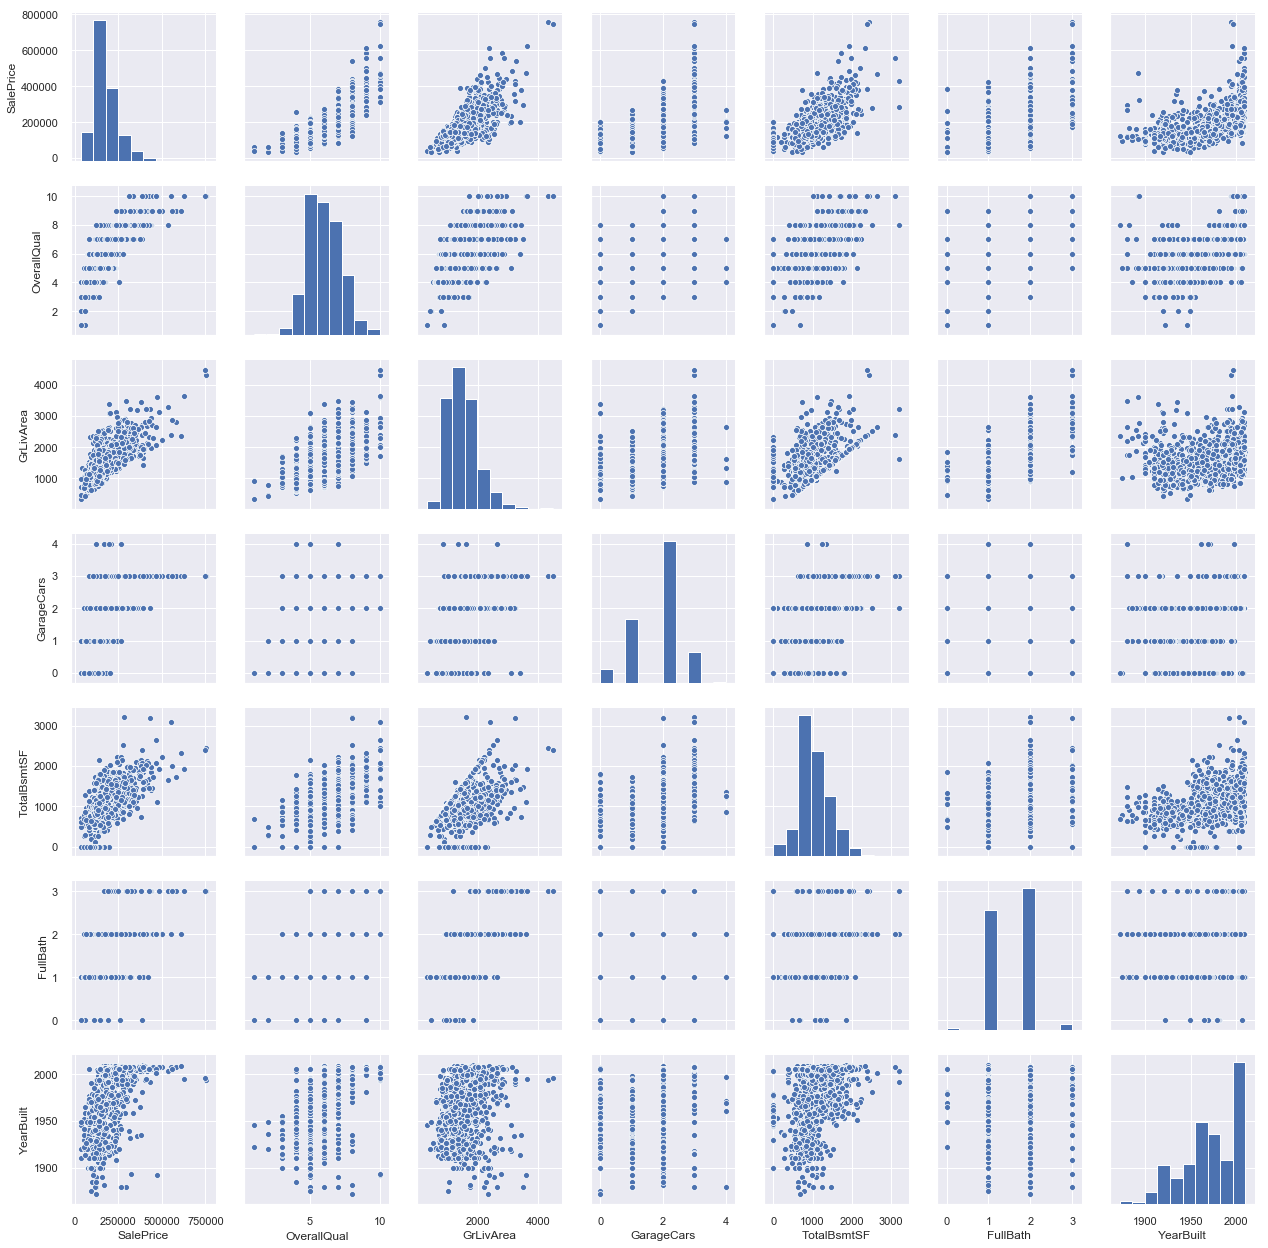

In [33]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

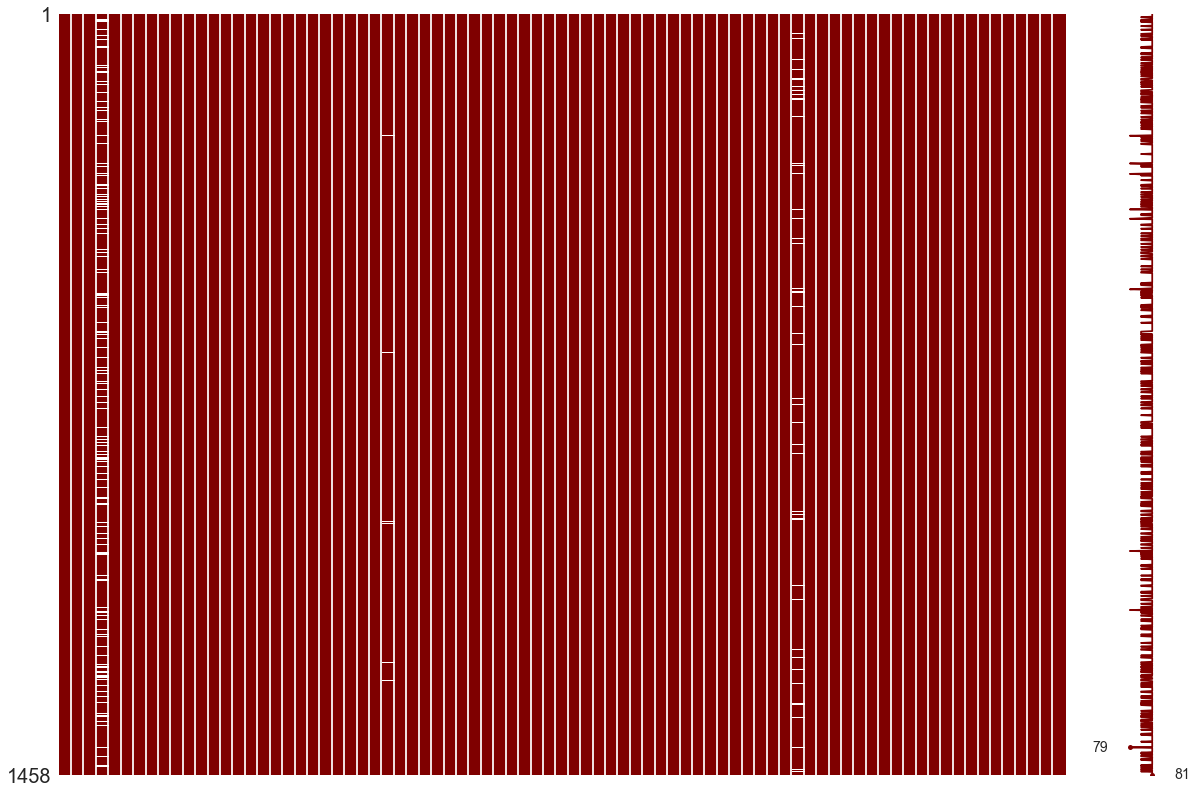

In [49]:
msno.matrix(df=train, figsize=(20,14), color=(0.5,0,0))

In [51]:
print('training data+++++++++++++++++++++')
for i in np.arange(df_train.shape[1]):
    n = df_train.iloc[:,i].isnull().sum() 
    if n > 0:
        print(list(df_train.columns.values)[i] + ': ' + str(n) + ' nans')

print('testing data++++++++++++++++++++++ ')
for i in np.arange(df_test.shape[1]):
    n = df_test.iloc[:,i].isnull().sum() 
    if n > 0:
        print(list(df_test.columns.values)[i] + ': ' + str(n) + ' nans')

training data+++++++++++++++++++++
LotFrontage: 259 nans
Alley: 1367 nans
MasVnrType: 8 nans
MasVnrArea: 8 nans
BsmtQual: 37 nans
BsmtCond: 37 nans
BsmtExposure: 38 nans
BsmtFinType1: 37 nans
BsmtFinType2: 38 nans
Electrical: 1 nans
FireplaceQu: 690 nans
GarageType: 81 nans
GarageYrBlt: 81 nans
GarageFinish: 81 nans
GarageQual: 81 nans
GarageCond: 81 nans
PoolQC: 1452 nans
Fence: 1177 nans
MiscFeature: 1404 nans
testing data++++++++++++++++++++++ 
MSZoning: 4 nans
LotFrontage: 227 nans
Alley: 1352 nans
Utilities: 2 nans
Exterior1st: 1 nans
Exterior2nd: 1 nans
MasVnrType: 16 nans
MasVnrArea: 15 nans
BsmtQual: 44 nans
BsmtCond: 45 nans
BsmtExposure: 44 nans
BsmtFinType1: 42 nans
BsmtFinSF1: 1 nans
BsmtFinType2: 42 nans
BsmtFinSF2: 1 nans
BsmtUnfSF: 1 nans
TotalBsmtSF: 1 nans
BsmtFullBath: 2 nans
BsmtHalfBath: 2 nans
KitchenQual: 1 nans
Functional: 2 nans
FireplaceQu: 730 nans
GarageType: 76 nans
GarageYrBlt: 78 nans
GarageFinish: 78 nans
GarageCars: 1 nans
GarageArea: 1 nans
GarageQual: 

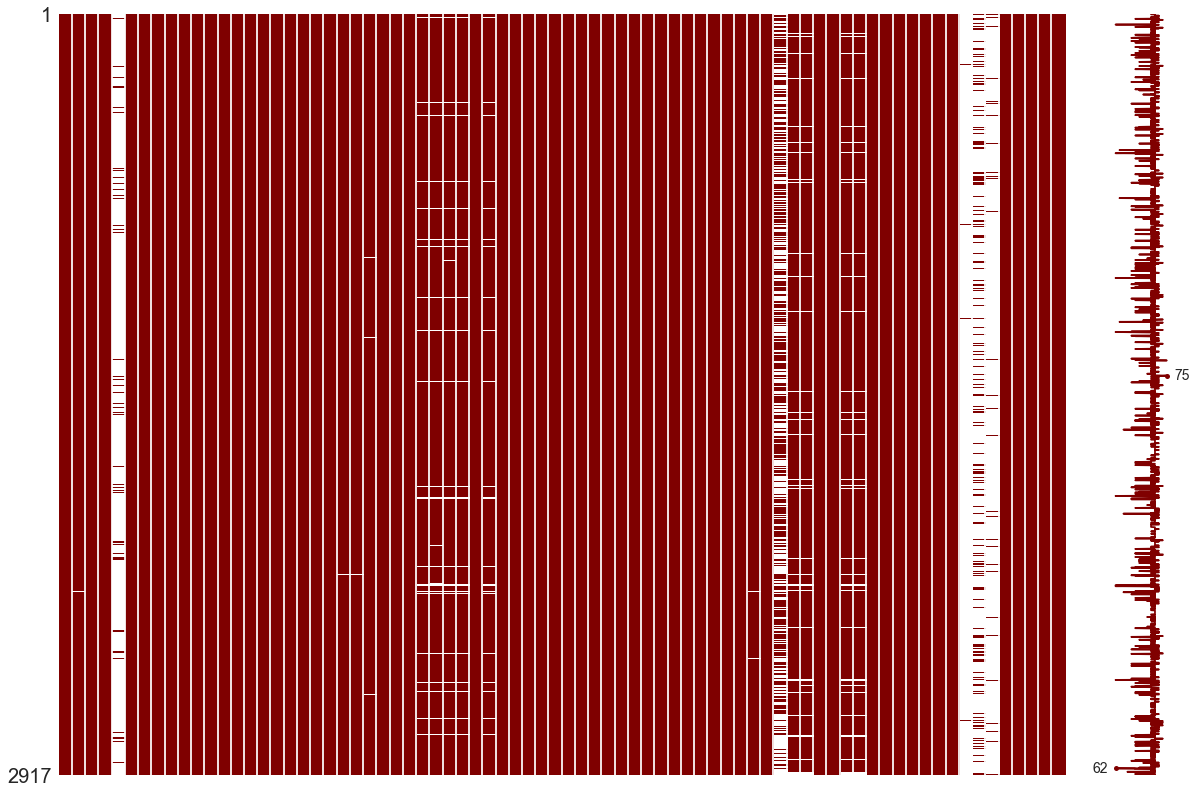

In [52]:
# keep ID for submission
train_ID = df_train['Id']
test_ID = df_test['Id']

# split data for training
y_train = df_train['SalePrice']
X_train = df_train.drop(['Id','SalePrice'], axis=1)
X_test = df_test.drop('Id', axis=1)

# dealing with missing data
Xmat = pd.concat([X_train, X_test])
Xmat = Xmat.drop(['LotFrontage','MasVnrArea','GarageYrBlt'], axis=1)
Xmat = Xmat.fillna(Xmat.median())

# check whether there are still nan
msno.matrix(df=Xmat, figsize=(20,14), color=(0.5,0,0))


In [53]:
print(Xmat.columns.values)
print(str(Xmat.shape[1]) + ' columns')

['MSSubClass' 'MSZoning' 'LotArea' 'Street' 'Alley' 'LotShape'
 'LandContour' 'Utilities' 'LotConfig' 'LandSlope' 'Neighborhood'
 'Condition1' 'Condition2' 'BldgType' 'HouseStyle' 'OverallQual'
 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle' 'RoofMatl'
 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond'
 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1'
 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF' 'TotalBsmtSF'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF' '2ndFlrSF'
 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath'
 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual' 'TotRmsAbvGrd'
 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType' 'GarageFinish'
 'GarageCars' 'GarageArea' 'GarageQual' 'GarageCond' 'PavedDrive'
 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch' '3SsnPorch' 'ScreenPorch'
 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature' 'MiscVal' 'MoSold' 'YrSold'
 'SaleType' 'SaleCondition']
76 columns


In [54]:
Xmat['TotalSF'] = Xmat['TotalBsmtSF'] + Xmat['1stFlrSF'] + Xmat['2ndFlrSF']
print('There are currently ' + str(Xmat.shape[1]) + ' columns.')


There are currently 77 columns.


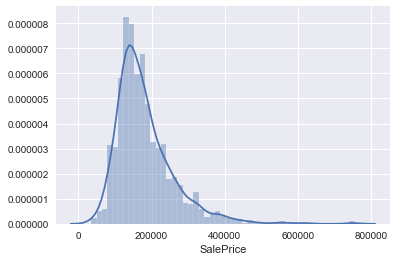

In [55]:
ax = sns.distplot(y_train)
plt.show()


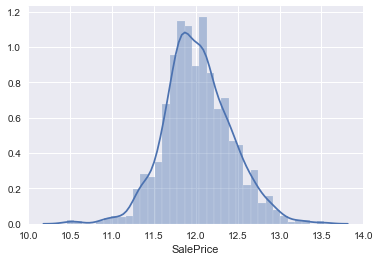

In [56]:
y_train = np.log(y_train)

ax = sns.distplot(y_train)
plt.show()


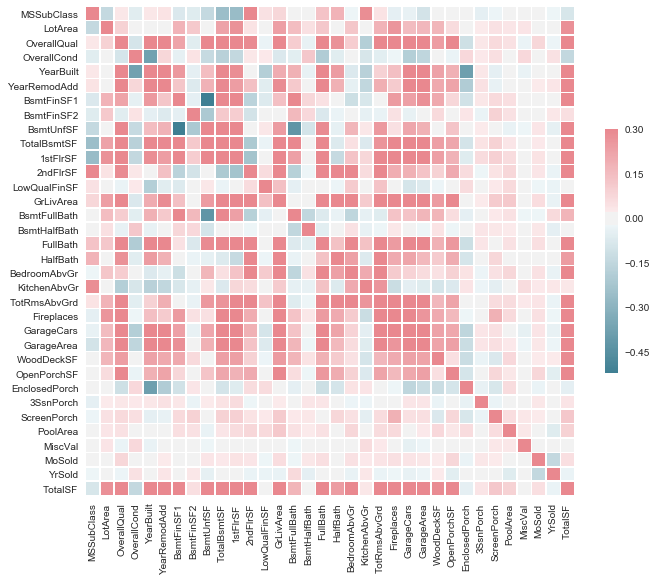

In [57]:
# train and test
X_train = Xmat.iloc[:train.shape[0],:]
X_test = Xmat.iloc[train.shape[0]:,:]

# Compute the correlation matrix
corr = X_train.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


In [59]:
df_train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011121,-0.021955,-0.037689,-0.030213,0.012925,-0.013463,-0.022694,-0.053184,-0.015012,...,-0.030262,-0.002115,0.003103,-0.046600,0.001491,0.048476,-0.006195,0.023511,0.000378,-0.021673
MSSubClass,0.011121,1.000000,-0.405399,-0.142033,0.032522,-0.059275,0.027757,0.040503,0.022785,-0.074434,...,-0.012681,-0.006659,-0.012002,-0.043813,-0.026004,0.008090,-0.007675,-0.013581,-0.021386,-0.084276
LotFrontage,-0.021955,-0.405399,1.000000,0.388580,0.235266,-0.056437,0.116552,0.081427,0.163938,0.146986,...,0.081603,0.116992,0.015230,0.074539,0.046278,0.116320,0.004992,0.026139,0.007813,0.370584
LotArea,-0.037689,-0.142033,0.388580,1.000000,0.091392,-0.002723,0.007462,0.007500,0.084529,0.175320,...,0.168621,0.061861,-0.016505,0.021362,0.045288,0.036491,0.039072,0.005744,-0.013699,0.268179
OverallQual,-0.030213,0.032522,0.235266,0.091392,1.000000,-0.090442,0.571368,0.549827,0.403421,0.222467,...,0.236753,0.297186,-0.113176,0.030991,0.066298,0.044758,-0.031238,0.072531,-0.026575,0.795774
OverallCond,0.012925,-0.059275,-0.056437,-0.002723,-0.090442,1.000000,-0.375572,0.074615,-0.126669,-0.042987,...,-0.002675,-0.029800,0.070120,0.025426,0.054632,0.002321,0.068728,-0.003735,0.043795,-0.077948
YearBuilt,-0.013463,0.027757,0.116552,0.007462,0.571368,-0.375572,1.000000,0.592105,0.312832,0.249818,...,0.223700,0.184116,-0.387093,0.031578,-0.049972,-0.005171,-0.034273,0.012975,-0.013250,0.523608
YearRemodAdd,-0.022694,0.040503,0.081427,0.007500,0.549827,0.074615,0.592105,1.000000,0.175677,0.123039,...,0.204591,0.222790,-0.193551,0.045504,-0.038360,-0.003426,-0.010160,0.022020,0.036145,0.507717
MasVnrArea,-0.053184,0.022785,0.163938,0.084529,0.403421,-0.126669,0.312832,0.175677,1.000000,0.239168,...,0.156532,0.104809,-0.109421,0.019585,0.063476,-0.020570,-0.029649,-0.004238,-0.007097,0.482719
BsmtFinSF1,-0.015012,-0.074434,0.146986,0.175320,0.222467,-0.042987,0.249818,0.123039,0.239168,1.000000,...,0.204993,0.072717,-0.103853,0.029177,0.068389,0.052981,0.004741,-0.004281,0.015767,0.409384
